 Training data shape: (4920, 133)
 Testing data shape: (42, 133)

 Number of Symptoms (Features): 132
 Number of Diseases (Labels): 41


d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the n


 Model Accuracy: 0.9761904761904762

 Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold      

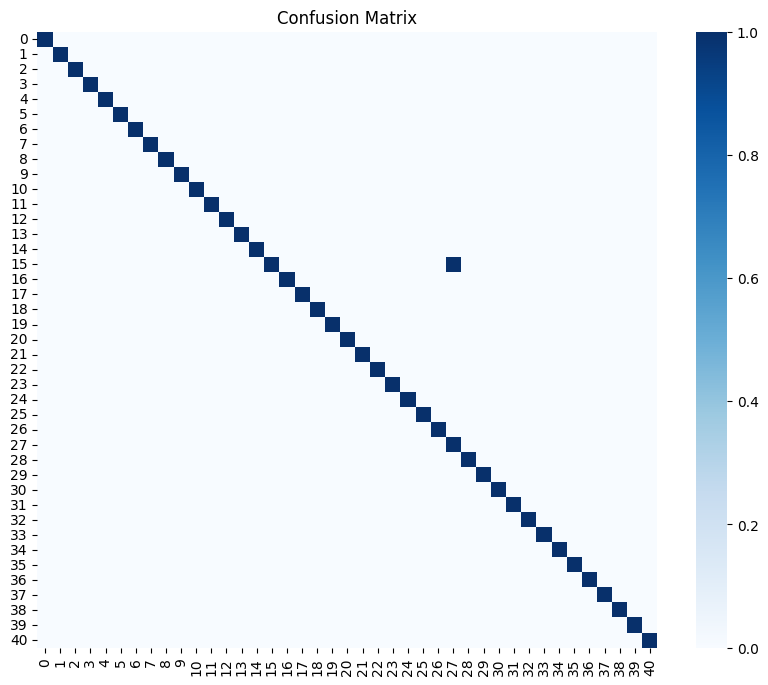

C:\Users\User\AppData\Local\Temp\ipykernel_13508\3037460594.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


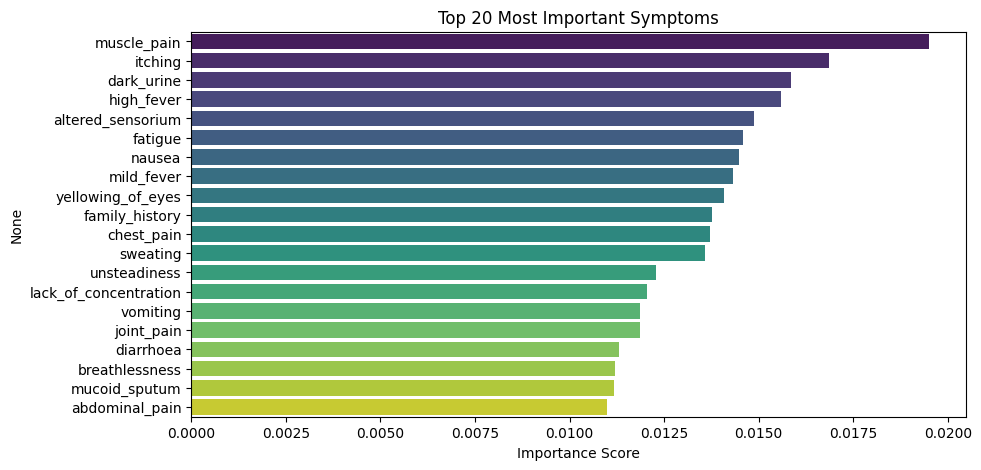


 Model saved successfully at: D:\Health-Care-Chatbot-main\model\health_model.pkl

 Based on symptoms: ['itching', 'skin_rash', 'nodal_skin_eruptions']
 Predicted Disease: Fungal infection


d:\Programs\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib


BASE_DIR = os.path.dirname(os.path.abspath(__file__))
train_path = os.path.join(BASE_DIR, "data", "Training.csv")
test_path = os.path.join(BASE_DIR, "data", "Testing.csv")
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# Drop unnamed/empty columns
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
test_df  = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

print(" Training data shape:", train_df.shape)
print(" Testing data shape:", test_df.shape)


X_train = train_df.drop(columns=['prognosis'])
y_train = train_df['prognosis']

X_test = test_df.drop(columns=['prognosis'])
y_test = test_df['prognosis']

print("\n Number of Symptoms (Features):", X_train.shape[1])
print(" Number of Diseases (Labels):", len(y_train.unique()))


model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\n Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 20 Most Important Symptoms")
plt.xlabel("Importance Score")
plt.show()


save_path = r"D:\Health-Care-Chatbot-main\model"
os.makedirs(save_path, exist_ok=True)  

model_file = os.path.join(save_path, "health_model.pkl")
joblib.dump(model, model_file)

print("\n Model saved successfully at:", model_file)


# Load the model (optional step)
# model = joblib.load(model_file)

# Get all symptom columns
symptoms = X_train.columns


user_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions']

# Convert symptoms to model input vector
input_data = np.zeros(len(symptoms))
for symptom in user_symptoms:
    if symptom in symptoms:
        index = np.where(symptoms == symptom)[0][0]
        input_data[index] = 1

# Predict disease
predicted_disease = model.predict([input_data])[0]

print("\n Based on symptoms:", user_symptoms)
print(" Predicted Disease:", predicted_disease)


In [ ]:



import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os


BASE_DIR = os.path.dirname(os.path.abspath(__file__))

train_path = os.path.join(BASE_DIR, "data", "Training.csv")
test_path = os.path.join(BASE_DIR, "data", "Testing.csv")

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# Drop unnamed columns
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
test_df  = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

# Features and labels
X_train = train_df.drop(columns=['prognosis'])
y_train = train_df['prognosis']

X_test = test_df.drop(columns=['prognosis'])
y_test = test_df['prognosis']


model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


desc_path = r"D:\Health-Care-Chatbot-main\data\symptom_description.csv"
prec_path = r"D:\Health-Care-Chatbot-main\data\precaution.csv"

desc_df = pd.read_csv(desc_path)
prec_df = pd.read_csv(prec_path)

print(" Description shape:", desc_df.shape)
print(" Precaution shape:", prec_df.shape)


save_path = r"D:\Health-Care-Chatbot-main\model"
os.makedirs(save_path, exist_ok=True)

# Save trained model
joblib.dump(model, os.path.join(save_path, "health_model.pkl"))
print(" Model saved!")

# Save descriptions and precautions for chatbot use
desc_df.to_csv(os.path.join(save_path, "symptom_description.csv"), index=False)
prec_df.to_csv(os.path.join(save_path, "precaution.csv"), index=False)
print(" Description & Precaution saved!")


 Accuracy: 0.9761904761904762

 Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00  

d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the n

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os


BASE_DIR = os.path.dirname(os.path.abspath(__file__))

train_path = os.path.join(BASE_DIR, "data", "Training.csv")
test_path  = os.path.join(BASE_DIR, "data", "Testing.csv")
desc_path  = os.path.join(BASE_DIR, "model", "symptom_description.csv")
prec_path  = os.path.join(BASE_DIR, "model", "precaution.csv")

# Load CSVs
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
desc_df = pd.read_csv(desc_path, quotechar='"')
prec_df = pd.read_csv(prec_path, quotechar='"')

print(" Training shape:", train_df.shape)
print(" Testing shape:", test_df.shape)
print(" Description shape:", desc_df.shape)
print(" Precaution shape:", prec_df.shape)


# Drop label column and fill missing values
X_train = train_df.drop(columns=['prognosis']).fillna(0).astype(int)

# Prepare X_test safely
X_test = test_df.drop(columns=['prognosis'], errors='ignore')

# Keep only columns present in training
common_cols = X_train.columns.intersection(X_test.columns)
X_test = X_test[common_cols].fillna(0).astype(int)

# Add any missing columns in test with zeros
missing_cols = X_train.columns.difference(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Reorder columns to match training set exactly
X_test = X_test[X_train.columns]

# Labels
y_train = train_df['prognosis'].astype(str)
y_test = test_df['prognosis'].astype(str)

print("Number of Symptoms (Features):", X_train.shape[1])
print("Number of Diseases (Labels):", len(y_train.unique()))

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train_encoded)


y_pred_encoded = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#  Label Encoder

model_dir = r"D:\Health-Care-Chatbot-main\model"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "health_model.pkl")
le_path = os.path.join(model_dir, "label_encoder.pkl")

joblib.dump(model, model_path)
joblib.dump(le, le_path)

print(f"\nModel saved at: {model_path}")
print(f" Label Encoder saved at: {le_path}")


predicted_disease = y_pred[0]  

# Get description
desc = desc_df.loc[desc_df['disease'] == predicted_disease, 'description'].values
desc = desc[0] if len(desc) > 0 else "Description not found."

# Get precautions
precautions = prec_df.loc[prec_df['disease'] == predicted_disease, 'precaution'].values
precautions = precautions[0] if len(precautions) > 0 else "Precautions not found."

print("\nPredicted Disease:", predicted_disease)
print("Description:", desc)
print("Precautions:", precautions)


 Training shape: (4920, 134)
 Testing shape: (42, 133)
 Description shape: (100, 2)
 Precaution shape: (100, 2)
Number of Symptoms (Features): 133
Number of Diseases (Labels): 41

Accuracy: 0.9761904761904762

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken 

d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Programs\lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the n